In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set_style("white")

In [45]:
df = pd.read_csv('/Users/emondemoniac/Desktop/TabNet_PyTorch/jiaojiao data/protSel.csv')
df.head()

,Unnamed: 0,CD81,DLST,COX6C,HMBS;NA,NA;NDUFB4,LARS2,CMSS1,RPL22,NAPG,...,TK1,YRDC,ADPRS,AHSA1,SRP19;NA,PGM2,DDX10,TBCB,DCP1A,PIP4K2B;NA
0,Balm_3_1_U_IO_DDA_30min_G6_1_5228,9.476314,10.793927,10.180248,NaN,NaN,9.118313,9.991407,13.608622,NaN,...,10.236633,9.320539,9.132962,12.127138,10.324695,10.639167,10.139863,11.277203,9.298717,8.531017
1,Balm_3_2_T_IO_DDA_30min_H6_1_5230,11.315730,10.590592,10.183011,9.339876,8.735686,9.469160,9.778208,10.954257,9.039564,...,9.963123,8.808265,9.485925,12.212055,9.983269,10.452389,9.931492,11.265912,8.467541,8.944589
2,Balm_3_3_U_IO_DDA_30min_A7_1_5232,NaN,11.155650,9.725437,9.526318,NaN,9.166984,NaN,12.727185,8.363576,...,10.347276,NaN,NaN,11.842517,9.478075,10.683179,10.091128,11.492519,NaN,NaN
3,Balm_3_4_T_IO_DDA_30min_B7_1_5234,NaN,11.252599,9.562967,9.175148,8.705927,9.313168,9.701677,13.147914,8.652441,...,10.300920,8.946153,9.136941,10.218882,NaN,10.486680,10.214862,11.698409,NaN,10.178616
4,DOHH_2_1_U_IO_DDA_30_C4_1_5188,10.441675,10.580073,9.660906,9.032039,9.545455,9.726034,10.002246,13.092749,8.996231,...,10.922046,9.568644,9.230143,12.145792,9.647950,10.552787,9.818964,11.174287,8.339549,9.274441


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Columns: 101 entries, Unnamed: 0 to PIP4K2B;NA
dtypes: float64(100), object(1)
memory usage: 38.0+ KB


# Without Preprocessing

In [47]:
binary_values = [random.choice([0, 1]) for _ in range(48)]

# Create a new column in the DataFrame and assign the generated binary values to it
df['NAN'] = binary_values

In [48]:
df.shape

(48, 102)

In [49]:
df.head()

,Unnamed: 0,CD81,DLST,COX6C,HMBS;NA,NA;NDUFB4,LARS2,CMSS1,RPL22,NAPG,...,YRDC,ADPRS,AHSA1,SRP19;NA,PGM2,DDX10,TBCB,DCP1A,PIP4K2B;NA,NAN
0,Balm_3_1_U_IO_DDA_30min_G6_1_5228,9.476314,10.793927,10.180248,NaN,NaN,9.118313,9.991407,13.608622,NaN,...,9.320539,9.132962,12.127138,10.324695,10.639167,10.139863,11.277203,9.298717,8.531017,0
1,Balm_3_2_T_IO_DDA_30min_H6_1_5230,11.315730,10.590592,10.183011,9.339876,8.735686,9.469160,9.778208,10.954257,9.039564,...,8.808265,9.485925,12.212055,9.983269,10.452389,9.931492,11.265912,8.467541,8.944589,1
2,Balm_3_3_U_IO_DDA_30min_A7_1_5232,NaN,11.155650,9.725437,9.526318,NaN,9.166984,NaN,12.727185,8.363576,...,NaN,NaN,11.842517,9.478075,10.683179,10.091128,11.492519,NaN,NaN,1
3,Balm_3_4_T_IO_DDA_30min_B7_1_5234,NaN,11.252599,9.562967,9.175148,8.705927,9.313168,9.701677,13.147914,8.652441,...,8.946153,9.136941,10.218882,NaN,10.486680,10.214862,11.698409,NaN,10.178616,1
4,DOHH_2_1_U_IO_DDA_30_C4_1_5188,10.441675,10.580073,9.660906,9.032039,9.545455,9.726034,10.002246,13.092749,8.996231,...,9.568644,9.230143,12.145792,9.647950,10.552787,9.818964,11.174287,8.339549,9.274441,1


In [50]:
df.isna().sum()

Unnamed: 0     0
CD81          14
DLST           0
COX6C          0
HMBS;NA        5
              ..
DDX10          0
TBCB           0
DCP1A         16
PIP4K2B;NA     7
NAN            0
Length: 102, dtype: int64

In [51]:
df.shape

(48, 102)

In [52]:
df = df.iloc[:,1:]
df.shape

(48, 101)

<Axes: >

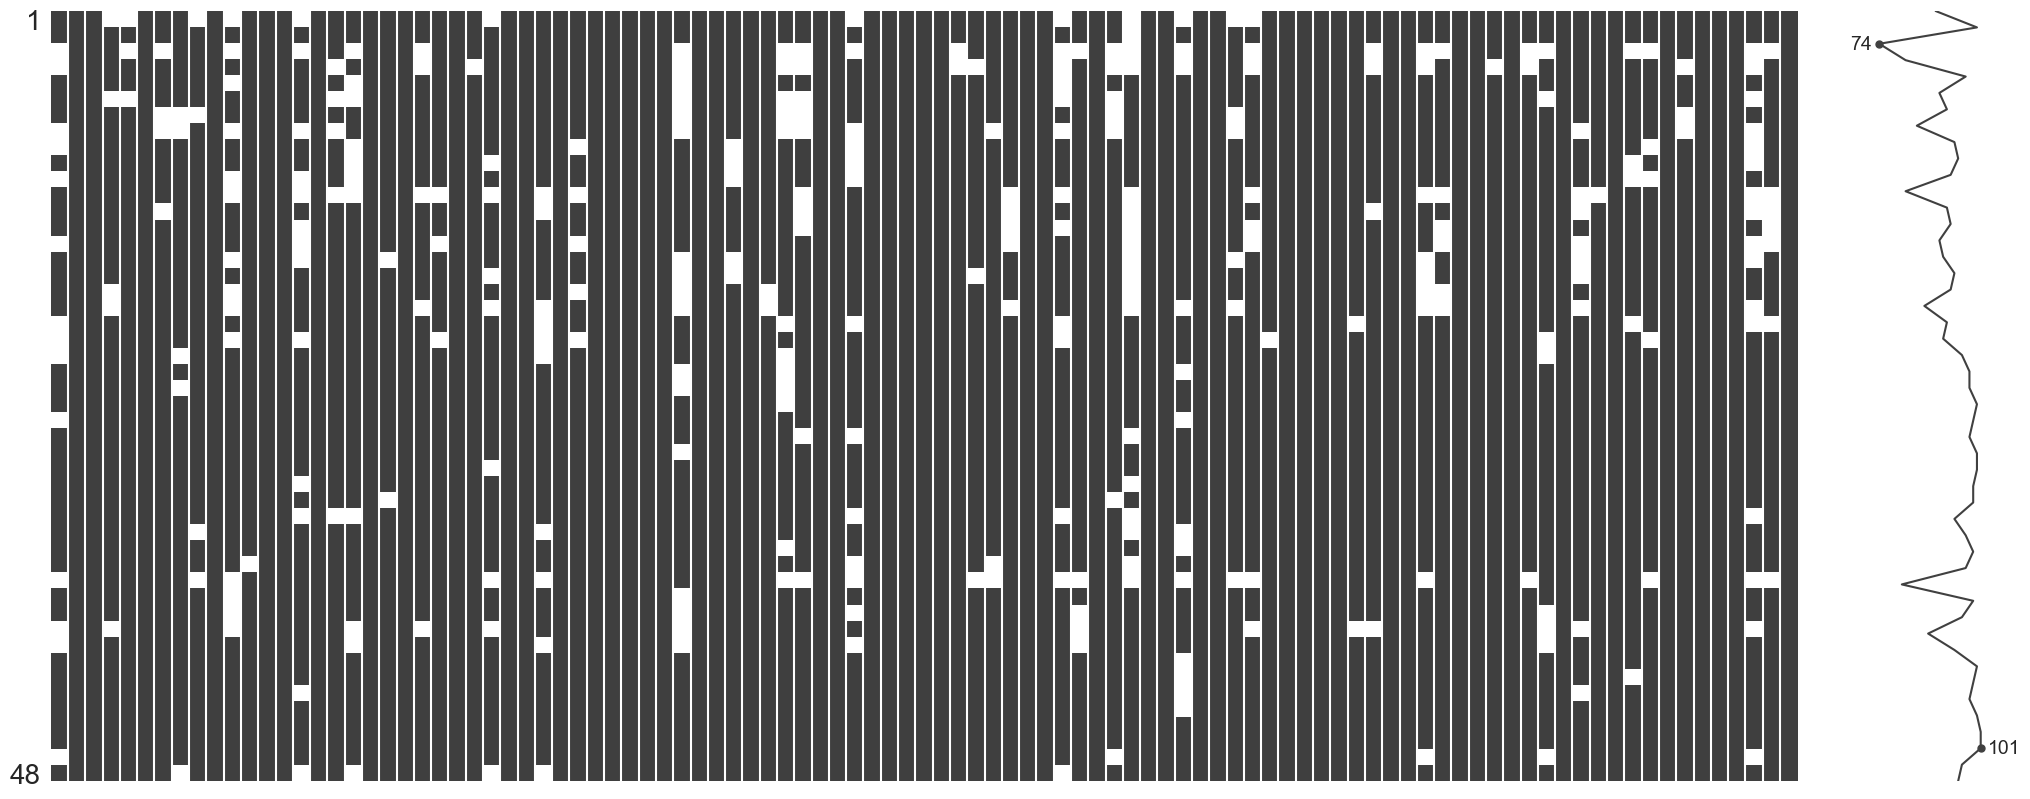

In [53]:
import missingno as msno
msno.matrix(df)

<Axes: >

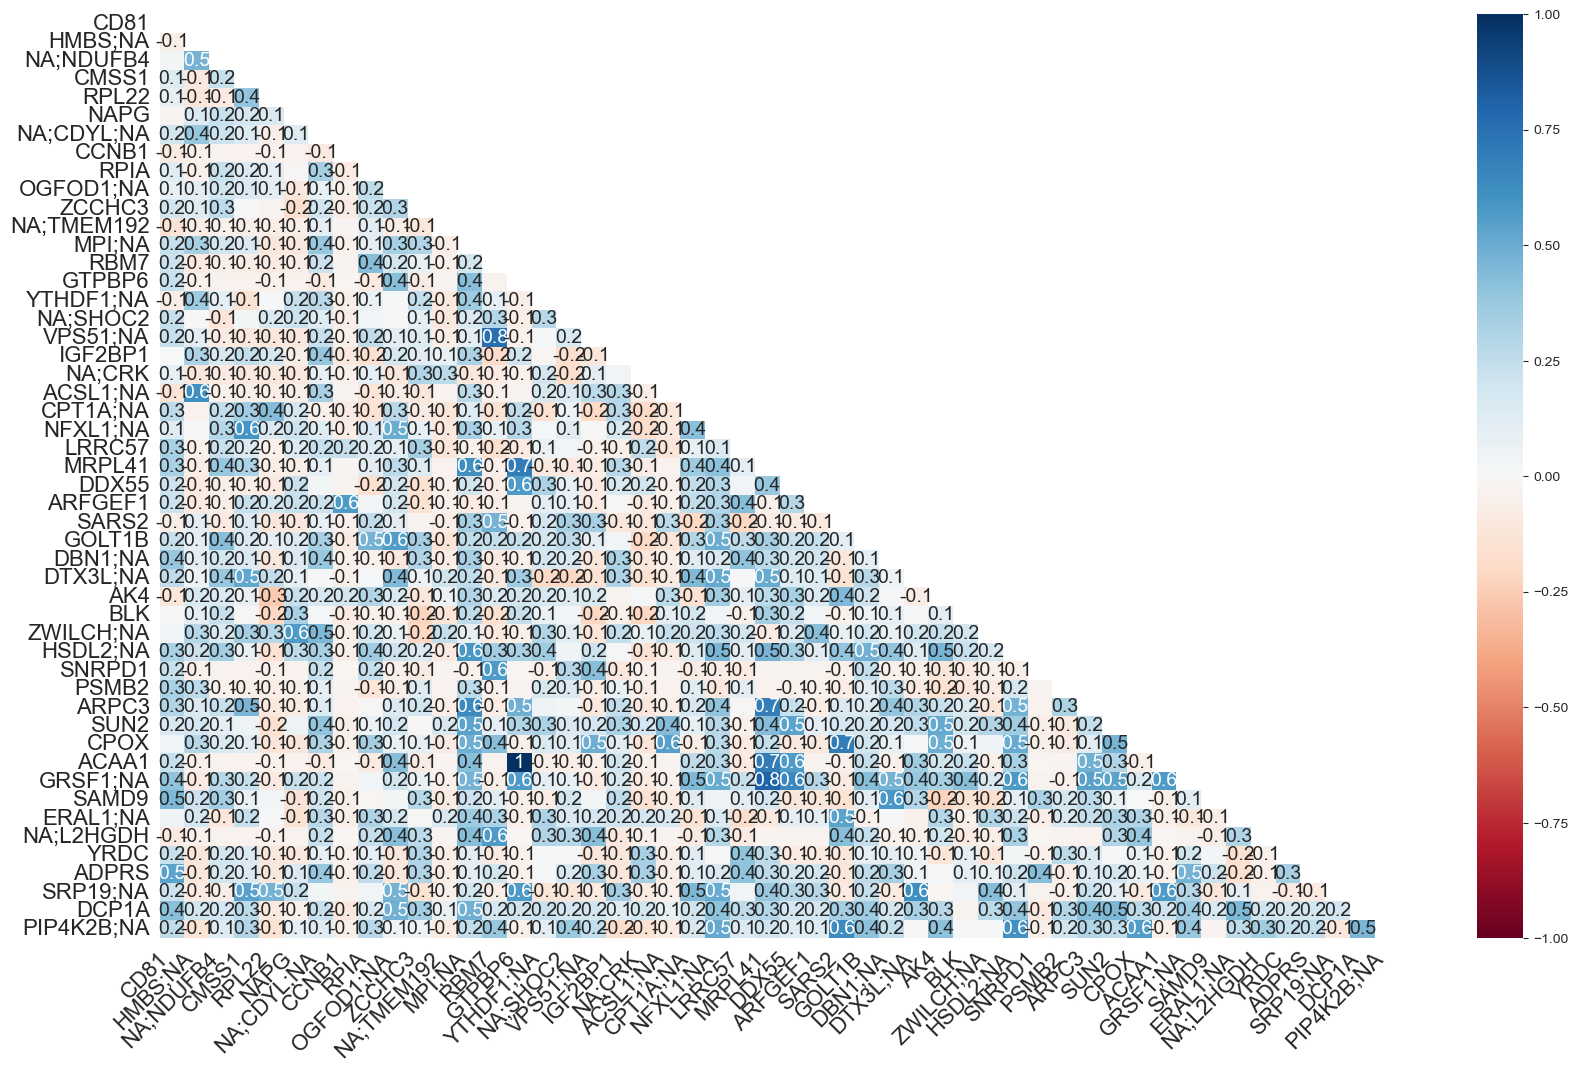

In [54]:
msno.heatmap(df)

In [153]:
feat = df.drop('NAN', axis = 1)

In [64]:
# separate our target and features variables
target = np.array(df['NAN'])
# Remove the target from the features
# axis 1 refers to the columns
features= df.drop('NAN', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [65]:
features.shape

(48, 100)

In [66]:
from numpy import isnan
from sklearn.impute import KNNImputer

# print total missing
print('Missing: %d' % sum(pd.isnull(features).flatten()))
# define imputer
imputer = KNNImputer(missing_values=np.nan)
# fit on the dataset
imputer.fit(features)
# transform the dataset
features_trans = imputer.transform(features)
# print total missing
print('Missing: %d' % sum(isnan(features_trans).flatten()))

Missing: 336
Missing: 0


In [67]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(features_trans, target, test_size=0.30, random_state=8)

In [68]:
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.50, random_state=8)

In [69]:
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier

import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score, balanced_accuracy_score
from sklearn.model_selection import KFold

np.random.seed(8)

In [142]:
clf1_nopreproc = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       n_d = 64, # range 8 - 64 , default = 8
                       n_a = 64, # range 8 - 64 , default = 8         
                       n_steps = 5,
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.5},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

/Users/emondemoniac/anaconda3/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [143]:
clf1_nopreproc.fit(
    x_train,y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy', 'balanced_accuracy'],
    max_epochs=1000 , patience=35,
    batch_size=55, virtual_batch_size=50,
    num_workers=0,
    weights=1,
    drop_last=False
)

epoch 0  | loss: 2.40043 | train_accuracy: 0.54545 | train_balanced_accuracy: 0.5     | valid_accuracy: 0.71429 | valid_balanced_accuracy: 0.5     |  0:00:00s
epoch 1  | loss: 1.18233 | train_accuracy: 0.54545 | train_balanced_accuracy: 0.5     | valid_accuracy: 0.71429 | valid_balanced_accuracy: 0.5     |  0:00:00s
epoch 2  | loss: 1.01005 | train_accuracy: 0.54545 | train_balanced_accuracy: 0.52222 | valid_accuracy: 0.71429 | valid_balanced_accuracy: 0.5     |  0:00:00s
epoch 3  | loss: 1.56626 | train_accuracy: 0.48485 | train_balanced_accuracy: 0.50556 | valid_accuracy: 0.57143 | valid_balanced_accuracy: 0.55    |  0:00:00s
epoch 4  | loss: 1.72417 | train_accuracy: 0.54545 | train_balanced_accuracy: 0.5     | valid_accuracy: 0.57143 | valid_balanced_accuracy: 0.4     |  0:00:00s
epoch 5  | loss: 0.7035  | train_accuracy: 0.54545 | train_balanced_accuracy: 0.5     | valid_accuracy: 0.71429 | valid_balanced_accuracy: 0.5     |  0:00:00s
epoch 6  | loss: 0.88181 | train_accuracy: 0.5

/Users/emondemoniac/anaconda3/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


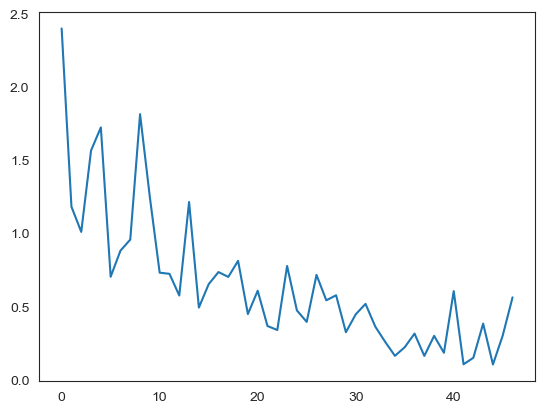

In [144]:
plt.plot(clf1_nopreproc.history['loss'])

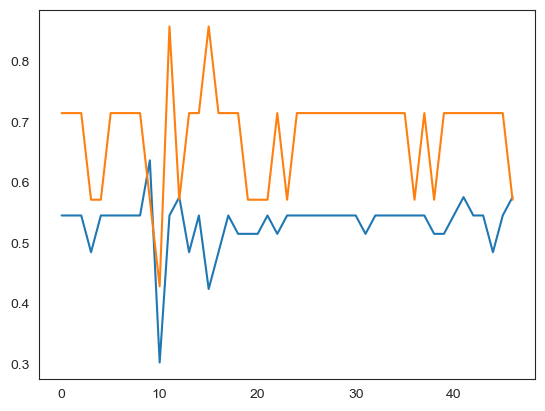

In [145]:
plt.plot(clf1_nopreproc.history['train_accuracy'])
plt.plot(clf1_nopreproc.history['valid_accuracy'])

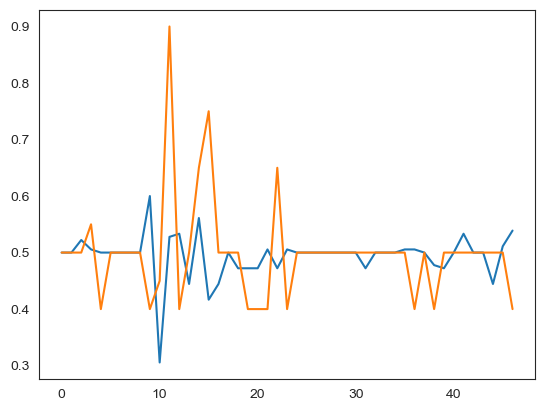

In [146]:
plt.plot(clf1_nopreproc.history['train_balanced_accuracy'])
plt.plot(clf1_nopreproc.history['valid_balanced_accuracy'])

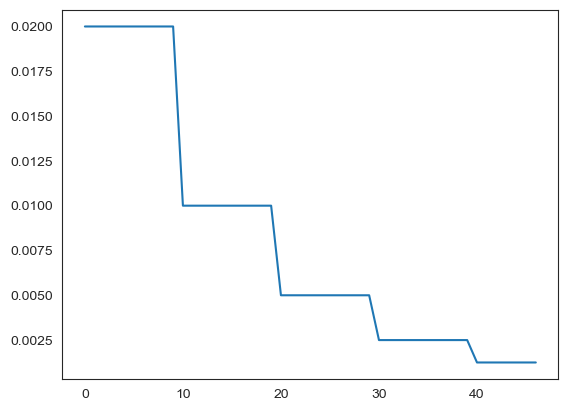

In [147]:
plt.plot(clf1_nopreproc.history['lr'])

In [148]:
preds = clf1_nopreproc.predict(x_test)
test_acc = balanced_accuracy_score(preds, y_test)


preds_valid = clf1_nopreproc.predict(x_val)
valid_acc = balanced_accuracy_score(preds_valid, y_val)

print(f"BEST ACCURACY SCORE ON VALIDATION SET : {valid_acc}")
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")

BEST ACCURACY SCORE ON VALIDATION SET : 0.8333333333333333
BEST ACCURACY SCORE ON TEST SET : 0.7


In [149]:
y_pred = clf1_nopreproc.predict(x_test)

In [150]:
clf1_nopreproc.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 1.61898095e-01, 1.30708916e-05,
       0.00000000e+00, 1.56235507e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.62620753e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.58549763e-01, 0.00000000e+00, 5.80058005e-03,
       0.00000000e+00, 0.00000000e+00, 3.03186331e-01, 9.42264424e-03,
       9.26165387e-03, 0.00000000e+00, 1.08007140e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.07979710e-03,
       0.00000000e+00, 7.40990058e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.99031577e-03, 0.00000000e+00,
       0.00000000e+00, 5.97444195e-03, 0.00000000e+00, 0.00000000e+00,
       7.94886141e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

<Axes: >

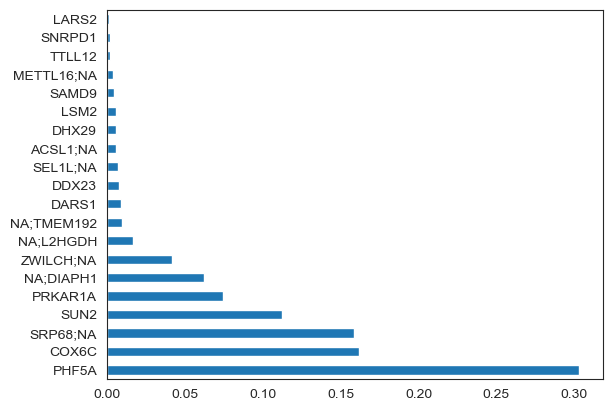

In [154]:
feat_importances = pd.Series(clf1_nopreproc.feature_importances_, index=feat.columns)
feat_importances.nlargest(20).plot(kind='barh')

# Unsupervised

In [163]:
from pytorch_tabnet.pretraining import TabNetPretrainer

In [164]:
# TabNetPretrainer
unsupervised_model_no_preproc = TabNetPretrainer(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax', # "sparsemax",
    )

/Users/emondemoniac/anaconda3/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [165]:
unsupervised_model_no_preproc.fit(
    x_train,
    eval_set=[x_val],
    max_epochs=400 , patience=40,
    batch_size=50, virtual_batch_size=64,
    num_workers=0,
    drop_last=False,
    pretraining_ratio=0.5,

)

epoch 0  | loss: 833.90814| val_0_unsup_loss_numpy: 9218.8291015625|  0:00:00s
epoch 1  | loss: 853.54156| val_0_unsup_loss_numpy: 4946.68359375|  0:00:00s
epoch 2  | loss: 831.10913| val_0_unsup_loss_numpy: 4125.06103515625|  0:00:00s
epoch 3  | loss: 841.29944| val_0_unsup_loss_numpy: 3840.908447265625|  0:00:00s
epoch 4  | loss: 786.97894| val_0_unsup_loss_numpy: 3949.338623046875|  0:00:00s
epoch 5  | loss: 767.40332| val_0_unsup_loss_numpy: 12494.701171875|  0:00:00s
epoch 6  | loss: 764.3642| val_0_unsup_loss_numpy: 7006.98388671875|  0:00:00s
epoch 7  | loss: 742.0697| val_0_unsup_loss_numpy: 10904.408203125|  0:00:00s
epoch 8  | loss: 696.21844| val_0_unsup_loss_numpy: 5217.12109375|  0:00:00s
epoch 9  | loss: 695.14453| val_0_unsup_loss_numpy: 2127.78857421875|  0:00:00s
epoch 10 | loss: 645.50702| val_0_unsup_loss_numpy: 1508.421875|  0:00:00s
epoch 11 | loss: 589.76428| val_0_unsup_loss_numpy: 1450.17333984375|  0:00:00s
epoch 12 | loss: 564.00098| val_0_unsup_loss_numpy: 17

/Users/emondemoniac/anaconda3/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [166]:
reconstructed_X, embedded_X = unsupervised_model_no_preproc.predict(x_val)
assert(reconstructed_X.shape==embedded_X.shape)

In [167]:
unsupervised_explain_matrix, unsupervised_masks = unsupervised_model_no_preproc.explain(x_val)

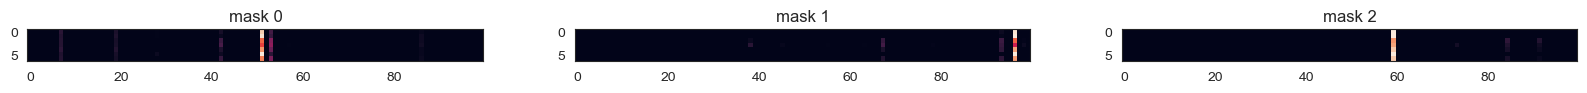

In [181]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(unsupervised_masks[i][:50])
    axs[i].set_title(f"mask {i}")

In [182]:
clf2_no_preproc = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparcemax' # This will be overwritten if using pretrain model
                      )

/Users/emondemoniac/anaconda3/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [185]:
loaded_pretrain = TabNetPretrainer()

/Users/emondemoniac/anaconda3/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [189]:
clf2_no_preproc.fit(
    x_train, y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=1000 , patience=40,
    batch_size=60, virtual_batch_size=60,
    num_workers=0,
    weights=1,
    drop_last=False,
)

epoch 0  | loss: 1.28175 | train_auc: 0.5037  | train_accuracy: 0.45455 | valid_auc: 0.7     | valid_accuracy: 0.28571 |  0:00:00s
epoch 1  | loss: 1.06916 | train_auc: 0.5     | train_accuracy: 0.39394 | valid_auc: 0.0     | valid_accuracy: 0.0     |  0:00:00s
epoch 2  | loss: 0.97095 | train_auc: 0.5037  | train_accuracy: 0.45455 | valid_auc: 0.2     | valid_accuracy: 0.28571 |  0:00:00s
epoch 3  | loss: 0.82203 | train_auc: 0.59259 | train_accuracy: 0.45455 | valid_auc: 0.4     | valid_accuracy: 0.28571 |  0:00:00s
epoch 4  | loss: 1.10379 | train_auc: 0.5     | train_accuracy: 0.39394 | valid_auc: 0.5     | valid_accuracy: 0.28571 |  0:00:00s
epoch 5  | loss: 0.76432 | train_auc: 0.52963 | train_accuracy: 0.45455 | valid_auc: 0.2     | valid_accuracy: 0.28571 |  0:00:00s
epoch 6  | loss: 0.70667 | train_auc: 0.51852 | train_accuracy: 0.39394 | valid_auc: 0.0     | valid_accuracy: 0.14286 |  0:00:00s
epoch 7  | loss: 0.86669 | train_auc: 0.51852 | train_accuracy: 0.48485 | valid_auc

/Users/emondemoniac/anaconda3/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


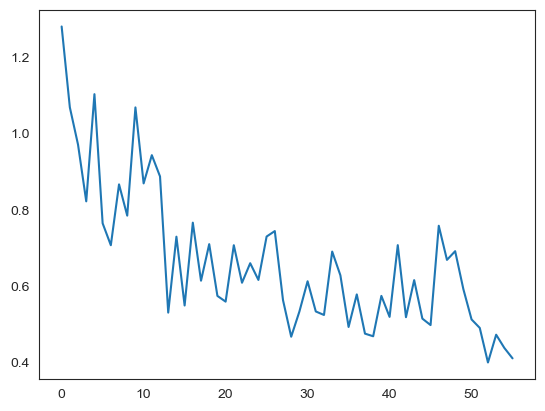

In [190]:
plt.plot(clf2_no_preproc.history['loss'])

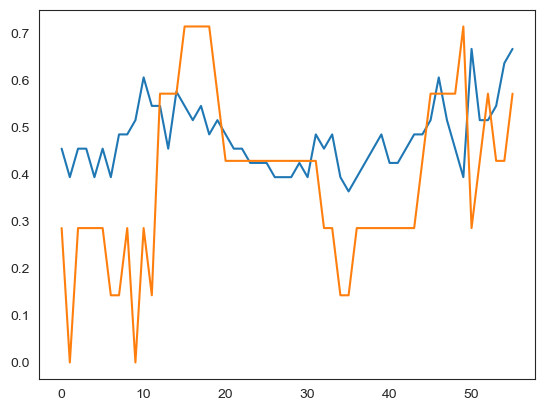

In [191]:
plt.plot(clf2_no_preproc.history['train_accuracy'])
plt.plot(clf2_no_preproc.history['valid_accuracy'])

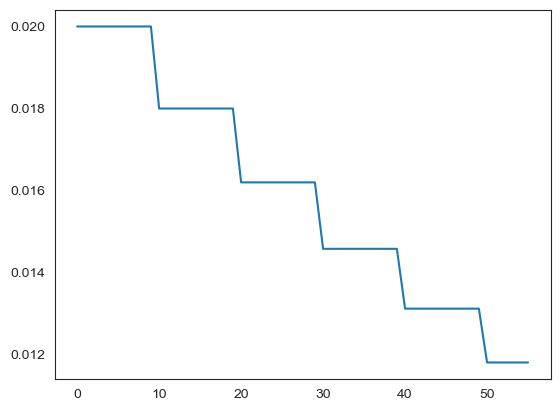

In [192]:
plt.plot(clf2_no_preproc.history['lr'])

In [193]:
preds = clf2_no_preproc.predict(x_test)
test_acc = accuracy_score(preds, y_test)


preds_valid = clf2_no_preproc.predict(x_val)
valid_acc = accuracy_score(preds_valid, y_val)

print(f"BEST ACCURACY SCORE ON VALIDATION SET : {valid_acc}")
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")

BEST ACCURACY SCORE ON VALIDATION SET : 0.7142857142857143
BEST ACCURACY SCORE ON TEST SET : 0.125


In [194]:
clf2_no_preproc.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.009079  , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0902311 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.39291449, 0.        ,
       0.        , 0.        , 0.2143267 , 0.00216971, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00309967,
       0.        , 0.        , 0.        , 0.00081067, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03924818, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01836906, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02637897, 0.        , 0.        , 0.08187

<Axes: >

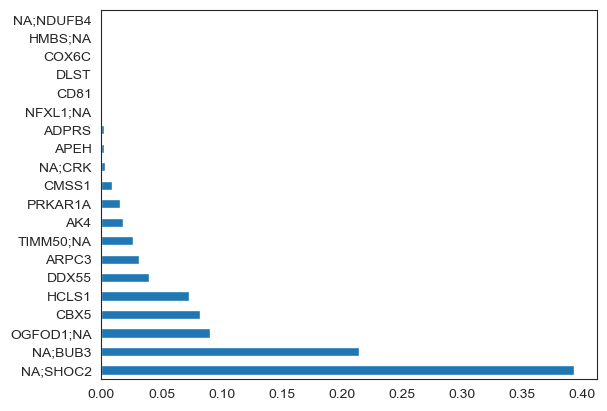

In [195]:
feat_importances = pd.Series(clf2_no_preproc.feature_importances_, index=feat.columns)
feat_importances.nlargest(20).plot(kind='barh')